In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]) # Normalize((mean),(std))

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 13382434.28it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200834.00it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3757009.10it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21592276.99it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


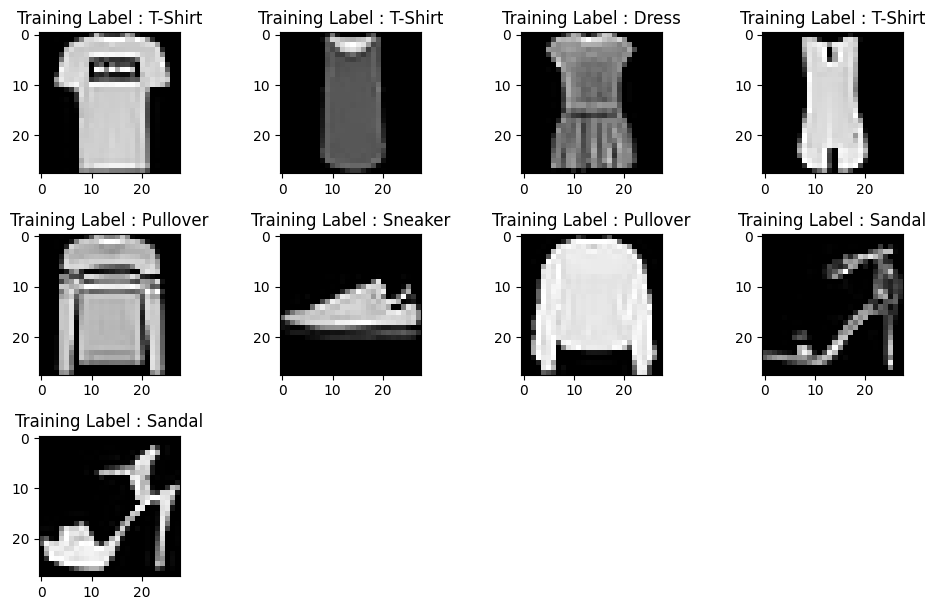

In [ ]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Part a

In [3]:
input_size = 784
out_size = 10

In [4]:
## Define the model
################ Your code ############
# model = nn.Sequential(

# )
#######################################
model = nn.Sequential(
    # add flatten layer
    nn.Flatten(),
    nn.Linear(input_size, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size),
    nn.LogSoftmax(dim=1)
)

# class FashionMNISTModel(nn.Module):
#     def __init__(self):
#         super().__init__()

#         # flatten layer
#         self.flatten = nn.Flatten()

#         # Input layer
#         self.input_layer = nn.Linear(784, 128)

#         # Hidden layers
#         self.hidden_layer_1 = nn.Linear(128, 64)
#         self.hidden_layer_2 = nn.Linear(64, 32)

#         # Output layer
#         self.output_layer = nn.Linear(32, 10)

#     def forward(self, x):
#         x = self.flatten(x)

#         x = self.input_layer(x)
#         x = F.relu(x)

#         x = self.hidden_layer_1(x)
#         x = F.relu(x)

#         x = self.hidden_layer_2(x)
#         x = F.relu(x)

#         x = self.output_layer(x)
#         return x

# # Create the model
# model = FashionMNISTModel()


In [5]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
#######################################

In [6]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=10, bias=True)
  (6): LogSoftmax(dim=1)
)


In [7]:
## Train your model
epochs = 10

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader: # get batch of images and labels

    images = images.view(images.shape[0],-1)  # flatten MNIST images into a 784 long vector

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model(images)
    # Calculate the loss
    loss = criterion(output, labels)
    #######################################

    # Backward pass to calculate the weight gradients
    loss.backward()

    # Update the model parameters
    optimizer.step()

    running_loss = running_loss+loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}") # print the average loss for the entire epoch

Training loss: 0.8385571663313584
Training loss: 0.5013908199918296
Training loss: 0.44879426610177514
Training loss: 0.41604458842513914
Training loss: 0.39337948754207414
Training loss: 0.37546845778092136
Training loss: 0.3619414933486534
Training loss: 0.3493888401337016
Training loss: 0.3385255498958549
Training loss: 0.32884212963775533


In [8]:
# !pip install d2l
!pip install d2l==0.17.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.3 MB/s eta 0:00:00


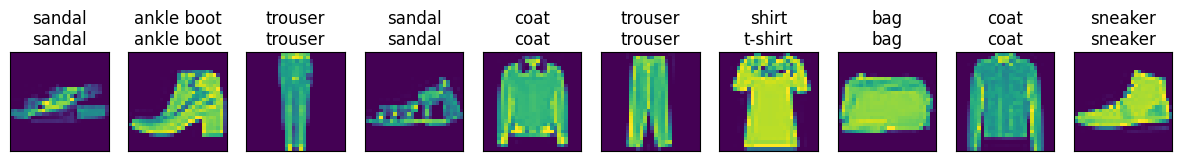

In [9]:
## Test your model
from d2l import torch as d2l
d2l.predict_ch3(model,testloader,n = 10) # predict 10 images
#########################

## Part b

In [10]:
# Training with overfitting
overfit_model = nn.Sequential(
    # add flatten layer
    nn.Flatten(),
    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size),
    nn.LogSoftmax(dim=1)
)

criterion_overfit = nn.CrossEntropyLoss()
optimizer_overfit = optim.SGD(overfit_model.parameters(), lr=0.01)

epochs_overfit = 30
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for e in range(epochs_overfit):
    overfit_model.train() # set the model to training mode
    running_loss = 0
    train_sum_accuracy = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer_overfit.zero_grad()
        output = overfit_model(images)
        loss = criterion_overfit(output, labels)
        loss.backward()
        optimizer_overfit.step()
        running_loss = running_loss + loss.item()
        train_sum_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    train_accuracy = train_sum_accuracy / len(trainloader.dataset)

    overfit_model.eval() # set the model to evaluation mode
    test_loss = 0
    test_sum_accuracy = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            output = overfit_model(images)
            test_loss += criterion_overfit(output, labels)
            test_sum_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    test_accuracy = test_sum_accuracy / len(testloader.dataset)

    train_losses.append(running_loss / len(trainloader))
    valid_losses.append(test_loss / len(testloader))
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(test_accuracy)

    print(f"Epoch {e + 1}/{epochs_overfit}.. "
          f"Training loss: {running_loss / len(trainloader):.3f}.. "
          f"Test loss: {test_loss / len(testloader):.3f}.. "
          f"Training accuracy: {train_accuracy:.3f}.. "
          f"Test accuracy: {test_accuracy:.3f}")



#############################################################################



#  class FashionMNISTModel(nn.Module):
#     def __init__(self):
#         super().__init__()

#         # Input layer
#         self.input_layer = nn.Linear(784, 512)

#         # Hidden layers
#         self.hidden_layer_1 = nn.Linear(512, 256)
#         self.hidden_layer_2 = nn.Linear(256, 128)
#         self.hidden_layer_3 = nn.Linear(128, 64)

#         # Output layer
#         self.output_layer = nn.Linear(64, 10)

#     def forward(self, x):
#         x = self.input_layer(x)
#         x = F.relu(x)

#         x = self.hidden_layer_1(x)
#         x = F.relu(x)

#         x = self.hidden_layer_2(x)
#         x = F.relu(x)

#         x = self.hidden_layer_3(x)
#         x = F.relu(x)

#         x = self.output_layer(x)
#         return x

# # Create the model
# model = FashionMNISTModel()

# # Set the optimizer
# optimizer = optim.SGD(model.parameters(), lr=0.01)

# # Train the model for 100 epochs
# epochs = 100
# for e in range(epochs):
#     running_loss = 0
#     for images, labels in trainloader:

#         images = images.view(images.shape[0], -1)

#         # Reset the default gradients
#         optimizer.zero_grad()

#         # Forward pass
#         output = model(images)

#         # Calculate the loss
#         loss = criterion(output, labels)

#         # Backward pass
#         loss.backward()

#         # Update the model parameters
#         optimizer.step()

#         # Update the running loss
#         running_loss = running_loss + loss.item()

#     # Print the training loss
#     print(f"Training loss: {running_loss / len(trainloader)}")


Epoch 1/30.. Training loss: 1.061.. Test loss: 0.651.. Training accuracy: 0.647.. Test accuracy: 0.757
Epoch 2/30.. Training loss: 0.547.. Test loss: 0.565.. Training accuracy: 0.807.. Test accuracy: 0.800
Epoch 3/30.. Training loss: 0.467.. Test loss: 0.487.. Training accuracy: 0.834.. Test accuracy: 0.825
Epoch 4/30.. Training loss: 0.427.. Test loss: 0.435.. Training accuracy: 0.847.. Test accuracy: 0.843
Epoch 5/30.. Training loss: 0.398.. Test loss: 0.413.. Training accuracy: 0.858.. Test accuracy: 0.851
Epoch 6/30.. Training loss: 0.377.. Test loss: 0.406.. Training accuracy: 0.865.. Test accuracy: 0.852
Epoch 7/30.. Training loss: 0.359.. Test loss: 0.389.. Training accuracy: 0.871.. Test accuracy: 0.861
Epoch 8/30.. Training loss: 0.346.. Test loss: 0.387.. Training accuracy: 0.875.. Test accuracy: 0.860
Epoch 9/30.. Training loss: 0.332.. Test loss: 0.426.. Training accuracy: 0.880.. Test accuracy: 0.846
Epoch 10/30.. Training loss: 0.321.. Test loss: 0.425.. Training accuracy

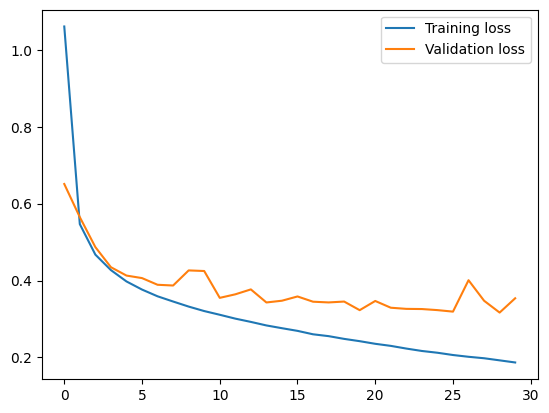

In [11]:
# Plot the training and validation losses
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
# plt.plot(train_losses, label='Overfitting model training loss')
# plt.plot(valid_losses, label='Overfitting model validation loss')
plt.legend()
plt.show()

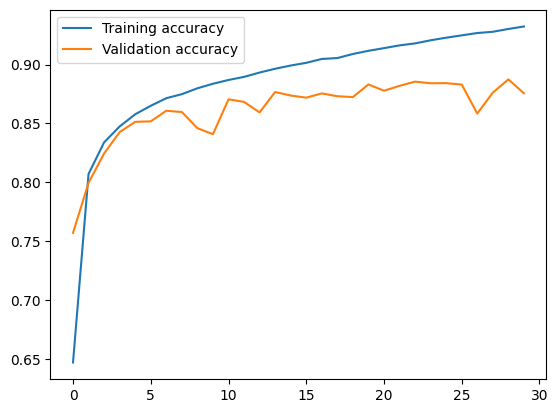

In [12]:
# plot the training and test accuracies
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(valid_accuracies, label='Validation accuracy')
# plt.plot(train_accuracies, label='Overfitting model training accuracy')
# plt.plot(valid_accuracies, label='Overfitting model validation accuracy')
plt.legend()
plt.show()

## Part c

In [13]:
# Data augmentation
transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    # transforms.RandomCrop(size=28, padding=4),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset_augmented = datasets.FashionMNIST('./data', download=True, train=True, transform=transform_augmented)
trainloader_augmented = torch.utils.data.DataLoader(trainset_augmented, batch_size=64, shuffle=True)

# trainloader_augmented = torch.utils.data.DataLoader(
#     trainset,
#     batch_size=64,
#     shuffle=True,
#     transform=transform_augmented,
# )

# Retrain the model with data augmentation
model_augmented = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size),
    nn.LogSoftmax(dim=1)
)

criterion_augmented = nn.CrossEntropyLoss()
optimizer_augmented = optim.SGD(model_augmented.parameters(), lr=0.01)

epochs_augmented = 30
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for e in range(epochs_augmented):
    model_augmented.train() # set the model to training mode
    running_loss = 0
    train_sum_accuracy = 0
    for images, labels in trainloader_augmented:
        images = images.view(images.shape[0], -1)
        optimizer_augmented.zero_grad()
        output = model_augmented(images)
        loss = criterion_augmented(output, labels)
        loss.backward()
        optimizer_augmented.step()
        running_loss = running_loss + loss.item()
        train_sum_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    train_accuracy = train_sum_accuracy / len(trainloader_augmented.dataset)

    model_augmented.eval() # set the model to evaluation mode
    test_loss = 0
    test_accuracy = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            output = model_augmented(images)
            test_loss += criterion_augmented(output, labels)
            test_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    test_accuracy = test_accuracy / len(testloader.dataset)

    train_losses.append(running_loss / len(trainloader_augmented))
    valid_losses.append(test_loss / len(testloader))
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(test_accuracy)

    print(f"Epoch {e + 1}/{epochs_augmented}.. "
          f"Training loss with data augmentation: {running_loss / len(trainloader_augmented):.3f}.. "
          f"Test loss with data augmentation: {test_loss / len(testloader):.3f}.. "
          f"Training accuracy with data augmentation: {train_accuracy:.3f}.. "
          f"Test accuracy with data augmentation: {test_accuracy:.3f}")


Epoch 1/30.. Training loss with data augmentation: 1.182.. Test loss with data augmentation: 0.721.. Training accuracy with data augmentation: 0.586.. Test accuracy with data augmentation: 0.735
Epoch 2/30.. Training loss with data augmentation: 0.640.. Test loss with data augmentation: 0.615.. Training accuracy with data augmentation: 0.770.. Test accuracy with data augmentation: 0.775
Epoch 3/30.. Training loss with data augmentation: 0.555.. Test loss with data augmentation: 0.544.. Training accuracy with data augmentation: 0.800.. Test accuracy with data augmentation: 0.797
Epoch 4/30.. Training loss with data augmentation: 0.509.. Test loss with data augmentation: 0.522.. Training accuracy with data augmentation: 0.817.. Test accuracy with data augmentation: 0.812
Epoch 5/30.. Training loss with data augmentation: 0.477.. Test loss with data augmentation: 0.482.. Training accuracy with data augmentation: 0.826.. Test accuracy with data augmentation: 0.825
Epoch 6/30.. Training los

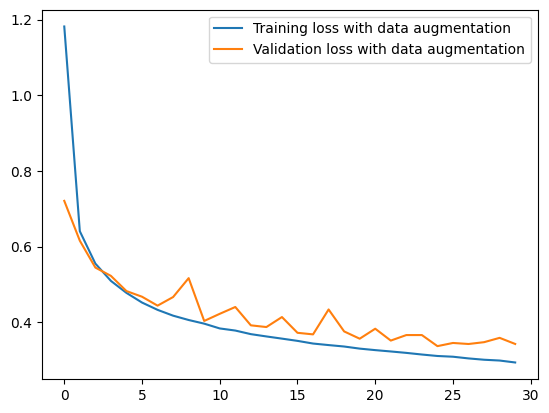

In [14]:
# Plot the training and validation losses
plt.plot(train_losses, label='Training loss with data augmentation')
plt.plot(valid_losses, label='Validation loss with data augmentation')
plt.legend()
plt.show()

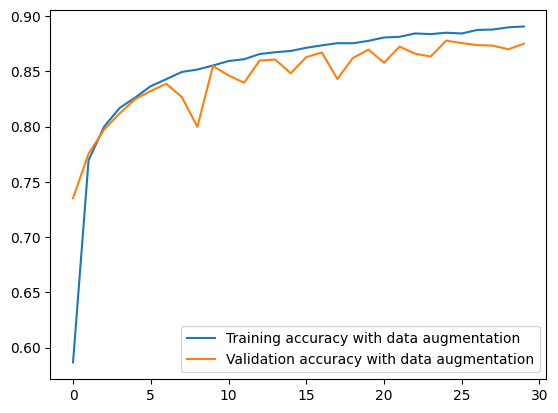

In [15]:
# plot the training and test accuracies
plt.plot(train_accuracies, label='Training accuracy with data augmentation')
plt.plot(valid_accuracies, label='Validation accuracy with data augmentation')
plt.legend()
plt.show()

## Part d(ت)

### L2 Regulariztion

In [28]:
# Define the model with L2 regularization
l2_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size),
    nn.LogSoftmax(dim=1)
)

# Define the criterion with L2 regularization
criterion_l2 = nn.CrossEntropyLoss()
optimizer_l2 = optim.SGD(l2_model.parameters(), lr=0.01, weight_decay=0.01)  # weight_decay is the L2 regularization parameter

# Train the model with L2 regularization
epochs_l2 = 30
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for e in range(epochs_l2):
    l2_model.train() # set the model to training mode
    running_loss = 0
    train_running_accuracy = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer_l2.zero_grad()
        output = l2_model(images)
        loss = criterion_l2(output, labels)
        loss.backward()
        optimizer_l2.step()
        running_loss = running_loss + loss.item()
        train_running_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    train_accuracy = train_running_accuracy / len(trainloader.dataset)

    l2_model.eval() # set the model to evaluation mode
    test_loss = 0
    test_accuracy = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            output = l2_model(images)
            test_loss += criterion_l2(output, labels)
            test_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    test_accuracy = test_accuracy / len(testloader.dataset)

    train_losses.append(running_loss / len(trainloader))
    valid_losses.append(test_loss / len(testloader))
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(test_accuracy)

    print(f"Epoch {e + 1}/{epochs_l2}.. "
          f"Training loss with L2 regularization: {running_loss / len(trainloader):.3f}.. "
          f"Test loss with L2 regularization: {test_loss / len(testloader):.3f}.. "
          f"Training accuracy with L2 regularization: {train_accuracy:.3f}.. "
          f"Test accuracy with L2 regularization: {test_accuracy:.3f}")



Epoch 1/30.. Training loss with L2 regularization: 1.072.. Test loss with L2 regularization: 0.680.. Training accuracy with L2 regularization: 0.649.. Test accuracy with L2 regularization: 0.757
Epoch 2/30.. Training loss with L2 regularization: 0.578.. Test loss with L2 regularization: 0.545.. Training accuracy with L2 regularization: 0.796.. Test accuracy with L2 regularization: 0.808
Epoch 3/30.. Training loss with L2 regularization: 0.498.. Test loss with L2 regularization: 0.505.. Training accuracy with L2 regularization: 0.826.. Test accuracy with L2 regularization: 0.821
Epoch 4/30.. Training loss with L2 regularization: 0.464.. Test loss with L2 regularization: 0.469.. Training accuracy with L2 regularization: 0.838.. Test accuracy with L2 regularization: 0.837
Epoch 5/30.. Training loss with L2 regularization: 0.443.. Test loss with L2 regularization: 0.522.. Training accuracy with L2 regularization: 0.846.. Test accuracy with L2 regularization: 0.816
Epoch 6/30.. Training los

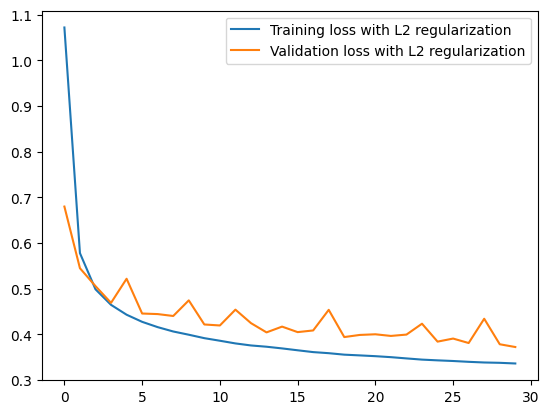

In [29]:
# Plot the training and validation errors
plt.plot(train_losses, label='Training loss with L2 regularization')
plt.plot(valid_losses, label='Validation loss with L2 regularization')
plt.legend()
plt.show()

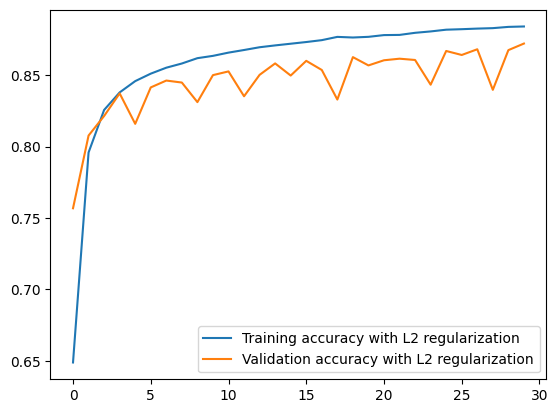

In [30]:
# plot the training and test accuracies
plt.plot(train_accuracies, label='Training accuracy with L2 regularization')
plt.plot(valid_accuracies, label='Validation accuracy with L2 regularization')
plt.legend()
plt.show()

### L1 Regularization

In [19]:
# Define the model with L1 regularization
l1_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, out_size),
    nn.LogSoftmax(dim=1)
)

# Define the criterion with L1 regularization
criterion_l1 = nn.CrossEntropyLoss()
optimizer_l1 = optim.SGD(l1_model.parameters(), lr=0.01)
lambda_l1 = 0.001  # L1 regularization parameter

# Train the model with L1 regularization
epochs_l1 = 30
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for e in range(epochs_l1):
    l1_model.train() # set the model to training mode
    running_loss = 0
    train_running_accuracy = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer_l1.zero_grad()
        output = l1_model(images)
        loss = criterion_l1(output, labels)
        l1_penalty = 0
        for param in l1_model.parameters():
            l1_penalty += torch.norm(param, 1)
        loss += lambda_l1 * l1_penalty  # Add L1 regularization term to the loss
        loss.backward()
        optimizer_l1.step()
        running_loss = running_loss + loss.item()
        train_running_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    train_accuracy = train_running_accuracy / len(trainloader.dataset)

    l1_model.eval() # set the model to evaluation mode
    test_loss = 0
    test_accuracy = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            output = l1_model(images)
            test_loss += criterion_l1(output, labels)
            l1_penalty = 0
            for param in l1_model.parameters():
                l1_penalty += torch.norm(param, 1)
            test_loss += lambda_l1 * l1_penalty  # Add L1 regularization term to the loss
            test_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    test_accuracy = test_accuracy / len(testloader.dataset)

    train_losses.append(running_loss / len(trainloader))
    valid_losses.append(test_loss / len(testloader))
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(test_accuracy)

    print(f"Epoch {e + 1}/{epochs_l1}.. "
          f"Training loss with L1 regularization: {running_loss / len(trainloader):.3f}.. "
          f"Test loss with L1 regularization: {test_loss / len(testloader):.3f}.. "
          f"Training accuracy with L1 regularization: {train_accuracy:.3f}.. "
          f"Test accuracy with L1 regularization: {test_accuracy:.3f}")


Epoch 1/30.. Training loss with L1 regularization: 9.977.. Test loss with L1 regularization: 7.480.. Training accuracy with L1 regularization: 0.605.. Test accuracy with L1 regularization: 0.724
Epoch 2/30.. Training loss with L1 regularization: 5.715.. Test loss with L1 regularization: 4.229.. Training accuracy with L1 regularization: 0.753.. Test accuracy with L1 regularization: 0.759
Epoch 3/30.. Training loss with L1 regularization: 3.165.. Test loss with L1 regularization: 2.358.. Training accuracy with L1 regularization: 0.781.. Test accuracy with L1 regularization: 0.780
Epoch 4/30.. Training loss with L1 regularization: 1.890.. Test loss with L1 regularization: 1.592.. Training accuracy with L1 regularization: 0.789.. Test accuracy with L1 regularization: 0.775
Epoch 5/30.. Training loss with L1 regularization: 1.377.. Test loss with L1 regularization: 1.254.. Training accuracy with L1 regularization: 0.797.. Test accuracy with L1 regularization: 0.792
Epoch 6/30.. Training los

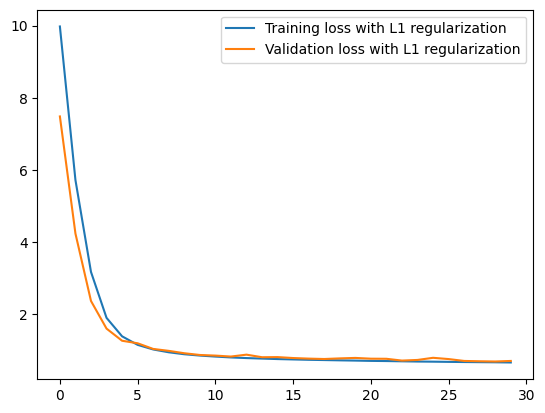

In [20]:
# Plot the training and validation losses
plt.plot(train_losses, label='Training loss with L1 regularization')
plt.plot(valid_losses, label='Validation loss with L1 regularization')
plt.legend()
plt.show()

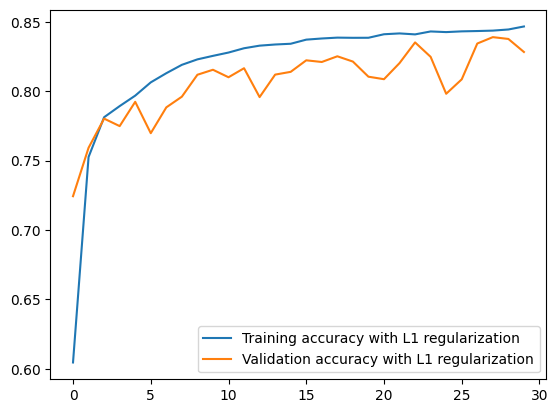

In [21]:
# plot the training and test accuracies
plt.plot(train_accuracies, label='Training accuracy with L1 regularization')
plt.plot(valid_accuracies, label='Validation accuracy with L1 regularization')
plt.legend()
plt.show()

## Part e(ث)

### all techniques with each other (Dropout, Data Augmentation, L2 regularization)



In [37]:
# Define the model with data augmentation, regularization, and dropout
improved_model = nn.Sequential(
    nn.Flatten(),

    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Dropout(0.5),  # Dropout layer with a dropout rate of 0.5

    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.3),  # Dropout layer with a dropout rate of 0.3

    nn.Linear(256, 128),
    nn.ReLU(),
    # nn.Dropout(0.2),  # Dropout layer with a dropout rate of 0.2

    nn.Linear(128, out_size),
    nn.LogSoftmax(dim=1)
)

# Define the criterion with regularization
criterion_improved = nn.CrossEntropyLoss()
optimizer_improved = optim.SGD(improved_model.parameters(), lr=0.01, weight_decay=0.01)  # Adding L2 regularization
transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    # transforms.RandomCrop(size=28, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Apply data augmentation
trainset_augmented = datasets.FashionMNIST('./data', download=True, train=True, transform=transform_augmented)
trainloader_augmented = torch.utils.data.DataLoader(trainset_augmented, batch_size=64, shuffle=True)

# Train the model with the combination of techniques
epochs_improved = 15
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for e in range(epochs_improved):
    improved_model.train() # set the model to training mode
    running_loss = 0
    train_running_accuracy = 0
    for images, labels in trainloader_augmented:
        images = images.view(images.shape[0], -1)
        optimizer_improved.zero_grad()
        output = improved_model(images)
        loss = criterion_improved(output, labels)
        loss.backward()
        optimizer_improved.step()
        running_loss = running_loss + loss.item()
        train_running_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    train_accuracy = train_running_accuracy / len(trainloader_augmented.dataset)

    improved_model.eval() # set the model to evaluation mode
    test_loss = 0
    test_accuracy = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            output = improved_model(images)
            test_loss += criterion_improved(output, labels)
            test_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    test_accuracy = test_accuracy / len(testloader.dataset)

    train_losses.append(running_loss / len(trainloader_augmented))
    valid_losses.append(test_loss / len(testloader))
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(test_accuracy)

    print(f"Epoch {e + 1}/{epochs_improved}.. "
          f"Training loss: {running_loss / len(trainloader_augmented):.3f}.. "
          f"Test loss: {test_loss / len(testloader):.3f}.. "
          f"Training accuracy: {train_accuracy:.3f}.. "
          f"Test accuracy: {test_accuracy:.3f}")



Epoch 1/15.. Training loss: 1.381.. Test loss: 0.822.. Training accuracy: 0.490.. Test accuracy: 0.698
Epoch 2/15.. Training loss: 0.796.. Test loss: 0.654.. Training accuracy: 0.712.. Test accuracy: 0.758
Epoch 3/15.. Training loss: 0.680.. Test loss: 0.600.. Training accuracy: 0.754.. Test accuracy: 0.779
Epoch 4/15.. Training loss: 0.623.. Test loss: 0.556.. Training accuracy: 0.777.. Test accuracy: 0.792
Epoch 5/15.. Training loss: 0.591.. Test loss: 0.534.. Training accuracy: 0.788.. Test accuracy: 0.804
Epoch 6/15.. Training loss: 0.567.. Test loss: 0.519.. Training accuracy: 0.798.. Test accuracy: 0.804
Epoch 7/15.. Training loss: 0.551.. Test loss: 0.501.. Training accuracy: 0.802.. Test accuracy: 0.818
Epoch 8/15.. Training loss: 0.538.. Test loss: 0.492.. Training accuracy: 0.808.. Test accuracy: 0.821
Epoch 9/15.. Training loss: 0.527.. Test loss: 0.499.. Training accuracy: 0.813.. Test accuracy: 0.818
Epoch 10/15.. Training loss: 0.519.. Test loss: 0.477.. Training accuracy

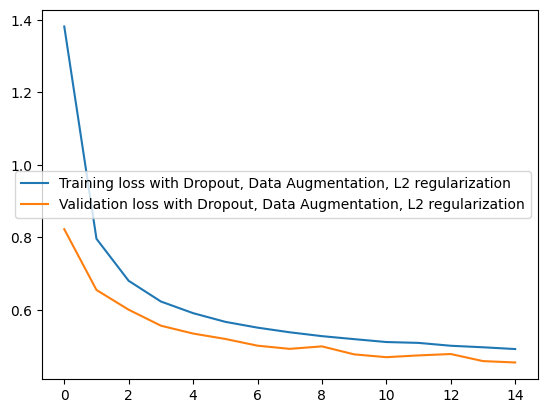

In [38]:
# Plot the training and validation losses
plt.plot(train_losses, label='Training loss with Dropout, Data Augmentation, L2 regularization')
plt.plot(valid_losses, label='Validation loss with Dropout, Data Augmentation, L2 regularization')
plt.legend()
plt.show()

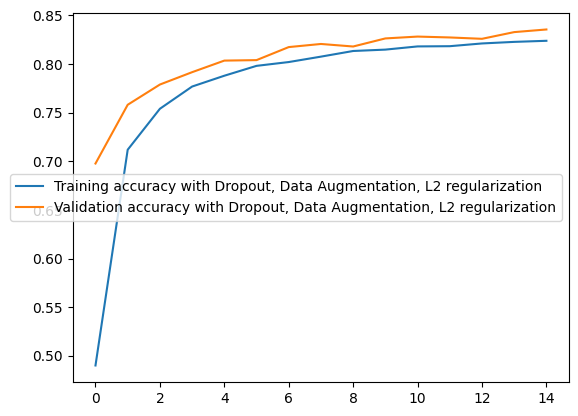

In [39]:
# plot the training and test accuracies
plt.plot(train_accuracies, label='Training accuracy with Dropout, Data Augmentation, L2 regularization')
plt.plot(valid_accuracies, label='Validation accuracy with Dropout, Data Augmentation, L2 regularization')
plt.legend()
plt.show()

### (Dropout, Data Augmentation)



Epoch 1/15.. Training loss: 1.391.. Test loss: 0.796.. Training accuracy: 0.490.. Test accuracy: 0.696
Epoch 2/15.. Training loss: 0.774.. Test loss: 0.627.. Training accuracy: 0.715.. Test accuracy: 0.762
Epoch 3/15.. Training loss: 0.645.. Test loss: 0.565.. Training accuracy: 0.765.. Test accuracy: 0.789
Epoch 4/15.. Training loss: 0.591.. Test loss: 0.520.. Training accuracy: 0.784.. Test accuracy: 0.806
Epoch 5/15.. Training loss: 0.550.. Test loss: 0.490.. Training accuracy: 0.798.. Test accuracy: 0.817
Epoch 6/15.. Training loss: 0.528.. Test loss: 0.480.. Training accuracy: 0.807.. Test accuracy: 0.823
Epoch 7/15.. Training loss: 0.508.. Test loss: 0.469.. Training accuracy: 0.816.. Test accuracy: 0.825
Epoch 8/15.. Training loss: 0.493.. Test loss: 0.448.. Training accuracy: 0.819.. Test accuracy: 0.836
Epoch 9/15.. Training loss: 0.479.. Test loss: 0.449.. Training accuracy: 0.825.. Test accuracy: 0.833
Epoch 10/15.. Training loss: 0.470.. Test loss: 0.436.. Training accuracy

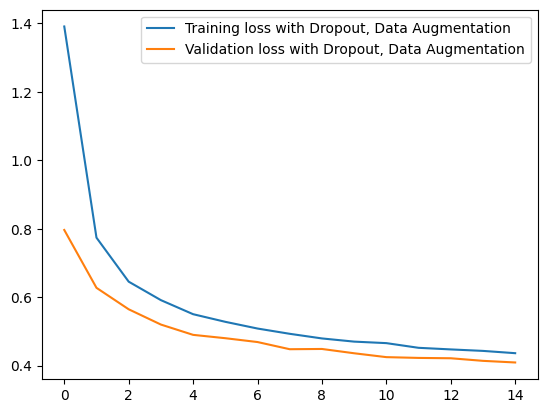

In [40]:
# Define the model with data augmentation, regularization, and dropout
improved_model = nn.Sequential(
    nn.Flatten(),

    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Dropout(0.5),  # Dropout layer with a dropout rate of 0.5

    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.3),  # Dropout layer with a dropout rate of 0.3

    nn.Linear(256, 128),
    nn.ReLU(),
    # nn.Dropout(0.2),  # Dropout layer with a dropout rate of 0.2

    nn.Linear(128, out_size),
    nn.LogSoftmax(dim=1)
)

# Define the criterion with regularization
criterion_improved = nn.CrossEntropyLoss()
optimizer_improved = optim.SGD(improved_model.parameters(), lr=0.01)
transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    # transforms.RandomCrop(size=28, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Apply data augmentation
trainset_augmented = datasets.FashionMNIST('./data', download=True, train=True, transform=transform_augmented)
trainloader_augmented = torch.utils.data.DataLoader(trainset_augmented, batch_size=64, shuffle=True)

# Train the model with the combination of techniques
epochs_improved = 15
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for e in range(epochs_improved):
    improved_model.train() # set the model to training mode
    running_loss = 0
    train_running_accuracy = 0
    for images, labels in trainloader_augmented:
        images = images.view(images.shape[0], -1)
        optimizer_improved.zero_grad()
        output = improved_model(images)
        loss = criterion_improved(output, labels)
        loss.backward()
        optimizer_improved.step()
        running_loss = running_loss + loss.item()
        train_running_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    train_accuracy = train_running_accuracy / len(trainloader_augmented.dataset)

    improved_model.eval() # set the model to evaluation mode
    test_loss = 0
    test_accuracy = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            output = improved_model(images)
            test_loss += criterion_improved(output, labels)
            test_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    test_accuracy = test_accuracy / len(testloader.dataset)

    train_losses.append(running_loss / len(trainloader_augmented))
    valid_losses.append(test_loss / len(testloader))
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(test_accuracy)

    print(f"Epoch {e + 1}/{epochs_improved}.. "
          f"Training loss: {running_loss / len(trainloader_augmented):.3f}.. "
          f"Test loss: {test_loss / len(testloader):.3f}.. "
          f"Training accuracy: {train_accuracy:.3f}.. "
          f"Test accuracy: {test_accuracy:.3f}")

# Plot the training and validation losses
plt.plot(train_losses, label='Training loss with Dropout, Data Augmentation')
plt.plot(valid_losses, label='Validation loss with Dropout, Data Augmentation')
plt.legend()
plt.show()

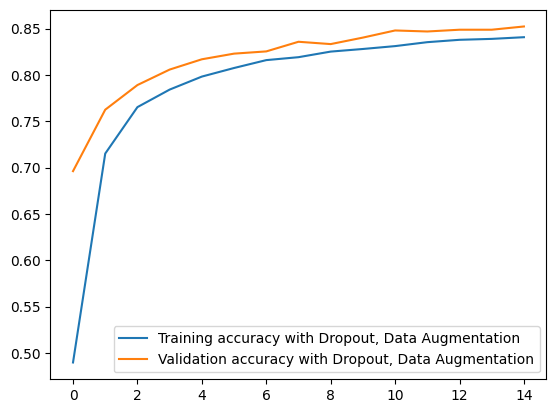

In [41]:
# plot the training and test accuracies
plt.plot(train_accuracies, label='Training accuracy with Dropout, Data Augmentation')
plt.plot(valid_accuracies, label='Validation accuracy with Dropout, Data Augmentation')
plt.legend()
plt.show()

### (Data Augmentation, L2 regularization)



Epoch 1/15.. Training loss: 1.223.. Test loss: 0.814.. Training accuracy: 0.583.. Test accuracy: 0.699
Epoch 2/15.. Training loss: 0.678.. Test loss: 0.616.. Training accuracy: 0.759.. Test accuracy: 0.778
Epoch 3/15.. Training loss: 0.595.. Test loss: 0.570.. Training accuracy: 0.788.. Test accuracy: 0.792
Epoch 4/15.. Training loss: 0.555.. Test loss: 0.546.. Training accuracy: 0.801.. Test accuracy: 0.801
Epoch 5/15.. Training loss: 0.529.. Test loss: 0.529.. Training accuracy: 0.811.. Test accuracy: 0.808
Epoch 6/15.. Training loss: 0.512.. Test loss: 0.508.. Training accuracy: 0.818.. Test accuracy: 0.817
Epoch 7/15.. Training loss: 0.498.. Test loss: 0.508.. Training accuracy: 0.823.. Test accuracy: 0.818
Epoch 8/15.. Training loss: 0.487.. Test loss: 0.498.. Training accuracy: 0.826.. Test accuracy: 0.821
Epoch 9/15.. Training loss: 0.476.. Test loss: 0.477.. Training accuracy: 0.830.. Test accuracy: 0.830
Epoch 10/15.. Training loss: 0.470.. Test loss: 0.469.. Training accuracy

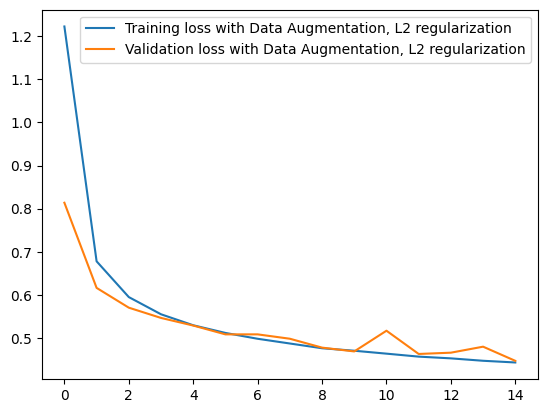

In [42]:
# Define the model with data augmentation, regularization, and dropout
improved_model = nn.Sequential(
    nn.Flatten(),

    nn.Linear(input_size, 512),
    nn.ReLU(),

    nn.Linear(512, 256),
    nn.ReLU(),

    nn.Linear(256, 128),
    nn.ReLU(),

    nn.Linear(128, out_size),
    nn.LogSoftmax(dim=1)
)

# Define the criterion with regularization
criterion_improved = nn.CrossEntropyLoss()
optimizer_improved = optim.SGD(improved_model.parameters(), lr=0.01, weight_decay=0.01)  # Adding L2 regularization
transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    # transforms.RandomCrop(size=28, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Apply data augmentation
trainset_augmented = datasets.FashionMNIST('./data', download=True, train=True, transform=transform_augmented)
trainloader_augmented = torch.utils.data.DataLoader(trainset_augmented, batch_size=64, shuffle=True)

# Train the model with the combination of techniques
epochs_improved = 15
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for e in range(epochs_improved):
    improved_model.train() # set the model to training mode
    running_loss = 0
    train_running_accuracy = 0
    for images, labels in trainloader_augmented:
        images = images.view(images.shape[0], -1)
        optimizer_improved.zero_grad()
        output = improved_model(images)
        loss = criterion_improved(output, labels)
        loss.backward()
        optimizer_improved.step()
        running_loss = running_loss + loss.item()
        train_running_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    train_accuracy = train_running_accuracy / len(trainloader_augmented.dataset)

    improved_model.eval() # set the model to evaluation mode
    test_loss = 0
    test_accuracy = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            output = improved_model(images)
            test_loss += criterion_improved(output, labels)
            test_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    test_accuracy = test_accuracy / len(testloader.dataset)

    train_losses.append(running_loss / len(trainloader_augmented))
    valid_losses.append(test_loss / len(testloader))
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(test_accuracy)

    print(f"Epoch {e + 1}/{epochs_improved}.. "
          f"Training loss: {running_loss / len(trainloader_augmented):.3f}.. "
          f"Test loss: {test_loss / len(testloader):.3f}.. "
          f"Training accuracy: {train_accuracy:.3f}.. "
          f"Test accuracy: {test_accuracy:.3f}")

# Plot the training and validation losses
plt.plot(train_losses, label='Training loss with Data Augmentation, L2 regularization')
plt.plot(valid_losses, label='Validation loss with Data Augmentation, L2 regularization')
plt.legend()
plt.show()

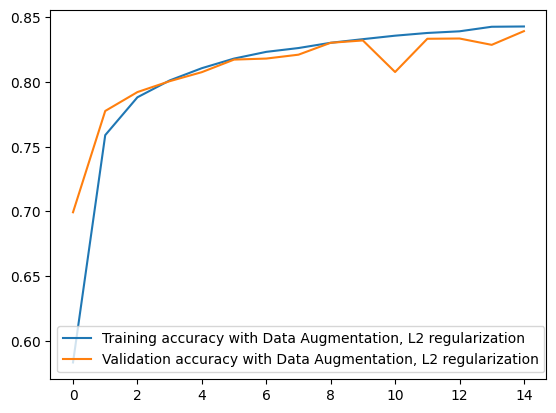

In [43]:
# plot the training and test accuracies
plt.plot(train_accuracies, label='Training accuracy with Data Augmentation, L2 regularization')
plt.plot(valid_accuracies, label='Validation accuracy with Data Augmentation, L2 regularization')
plt.legend()
plt.show()

### (Dropout, L2 regularization)



Epoch 1/15.. Training loss: 1.264.. Test loss: 0.747.. Training accuracy: 0.543.. Test accuracy: 0.719
Epoch 2/15.. Training loss: 0.690.. Test loss: 0.578.. Training accuracy: 0.751.. Test accuracy: 0.786
Epoch 3/15.. Training loss: 0.579.. Test loss: 0.531.. Training accuracy: 0.794.. Test accuracy: 0.808
Epoch 4/15.. Training loss: 0.525.. Test loss: 0.492.. Training accuracy: 0.814.. Test accuracy: 0.821
Epoch 5/15.. Training loss: 0.497.. Test loss: 0.464.. Training accuracy: 0.823.. Test accuracy: 0.828
Epoch 6/15.. Training loss: 0.477.. Test loss: 0.451.. Training accuracy: 0.831.. Test accuracy: 0.836
Epoch 7/15.. Training loss: 0.460.. Test loss: 0.442.. Training accuracy: 0.837.. Test accuracy: 0.841
Epoch 8/15.. Training loss: 0.447.. Test loss: 0.437.. Training accuracy: 0.843.. Test accuracy: 0.844
Epoch 9/15.. Training loss: 0.441.. Test loss: 0.428.. Training accuracy: 0.845.. Test accuracy: 0.847
Epoch 10/15.. Training loss: 0.435.. Test loss: 0.426.. Training accuracy

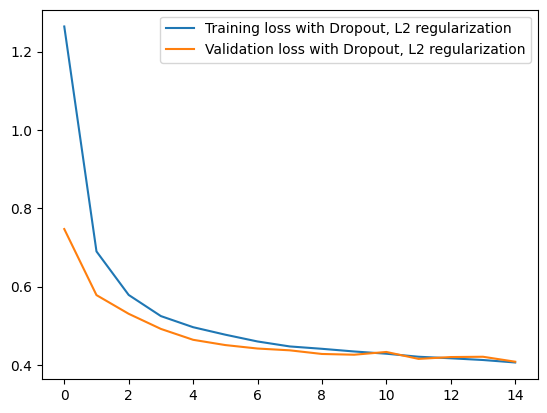

In [44]:
# Define the model with data augmentation, regularization, and dropout
improved_model = nn.Sequential(
    nn.Flatten(),

    nn.Linear(input_size, 512),
    nn.ReLU(),
    nn.Dropout(0.5),  # Dropout layer with a dropout rate of 0.5

    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.3),  # Dropout layer with a dropout rate of 0.3

    nn.Linear(256, 128),
    nn.ReLU(),
    # nn.Dropout(0.2),  # Dropout layer with a dropout rate of 0.2

    nn.Linear(128, out_size),
    nn.LogSoftmax(dim=1)
)

# Define the criterion with regularization
criterion_improved = nn.CrossEntropyLoss()
optimizer_improved = optim.SGD(improved_model.parameters(), lr=0.01, weight_decay=0.01)  # Adding L2 regularization

# Train the model with the combination of techniques
epochs_improved = 15
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for e in range(epochs_improved):
    improved_model.train() # set the model to training mode
    running_loss = 0
    train_running_accuracy = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer_improved.zero_grad()
        output = improved_model(images)
        loss = criterion_improved(output, labels)
        loss.backward()
        optimizer_improved.step()
        running_loss = running_loss + loss.item()
        train_running_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    train_accuracy = train_running_accuracy / len(trainloader.dataset)

    improved_model.eval() # set the model to evaluation mode
    test_loss = 0
    test_accuracy = 0

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            output = improved_model(images)
            test_loss += criterion_improved(output, labels)
            test_accuracy += (output.argmax(1) == labels).type(torch.float).sum().item()
    test_accuracy = test_accuracy / len(testloader.dataset)

    train_losses.append(running_loss / len(trainloader))
    valid_losses.append(test_loss / len(testloader))
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(test_accuracy)

    print(f"Epoch {e + 1}/{epochs_improved}.. "
          f"Training loss: {running_loss / len(trainloader):.3f}.. "
          f"Test loss: {test_loss / len(testloader):.3f}.. "
          f"Training accuracy: {train_accuracy:.3f}.. "
          f"Test accuracy: {test_accuracy:.3f}")

# Plot the training and validation losses
plt.plot(train_losses, label='Training loss with Dropout, L2 regularization')
plt.plot(valid_losses, label='Validation loss with Dropout, L2 regularization')
plt.legend()
plt.show()

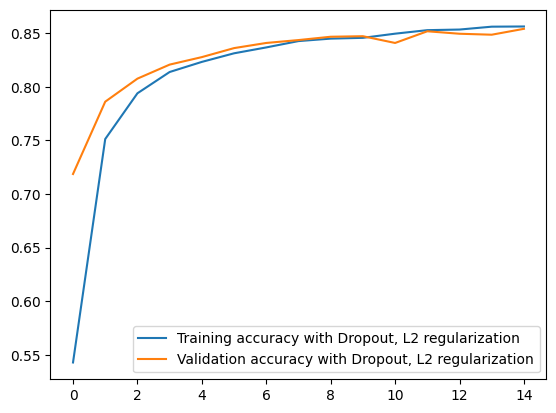

In [45]:
# plot the training and test accuracies
plt.plot(train_accuracies, label='Training accuracy with Dropout, L2 regularization')
plt.plot(valid_accuracies, label='Validation accuracy with Dropout, L2 regularization')
plt.legend()
plt.show()